In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
with open("Traffic_violations.csv", "r") as csv_file:
    headers = " ".join([line.strip() for line in csv_file.readlines()[:2]]).split(",")

df = pd.read_csv("Traffic_violations.csv", encoding="Latin-1", delimiter=",",
                   skiprows=1, header=None).iloc[:, 1:]

/var/folders/q2/k9xdm7wn3_7cpc75plnlzl640000gn/T/ipykernel_77416/2694403725.py:4: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Traffic_violations.csv", encoding="Latin-1", delimiter=",",


In [43]:
print(df.shape)
df.head(3)

(1859607, 42)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,17-107(a1),NaN,NaN,MD,02 - Automobile,2007.0,CHEV,CRUZ,BLACK,Citation,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,04/30/2023,23:55:00,MCP,"4th District, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,KEMP MILL ROAD @ ALPERT LANE,39.053038,-77.024637,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,55*,NaN,NaN,MD,02 - Automobile,2013.0,HYUNDAI,SONATA,RED,Citation,13-401(h),Transportation Article,False,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0530383333333, -77.0246366666667)"
2,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-304(c),NaN,NaN,MD,02 - Automobile,2019.0,NISSAN,ALTIMA,GRAY,Citation,21-901.1(b),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"


In [44]:
# 'SeqID',
df.columns=['Date_Of_Stop','Time_Of_Stop','Agency','SubAgency','Description','Location',
'Latitude','Longitude','Accident','Belts','Personal_Injury','Property_Damage','Fatal',
'Commercial_License','HAZMAT','Commercial_Vehicle','Alcohol','Work_Zone','Search_Conducted',
'Search_Disposition','Search_Outcome','Search_Reason','Search_Reason_For_Stop','Search_Type',
'Search_Arrest_Reason','State','VehicleType','Year','Make','Model','Color','Violation_Type',
'Charge','Article','Contributed_To_Accident','Race','Gender','Driver_City','Driver_State','DL_State', 
'Arrest_Type', 'Geolocation']

In [47]:
data = df.copy()
pd.set_option('display.max_columns', None)
data.head()


SyntaxError: invalid syntax (2413980745.py, line 1)

In [46]:
print('search type: ', data.Search_Type.unique())
print('HAZMAT: ', data.HAZMAT.unique())

search type:  [nan 'Both' 'Property' 'Person' 'Search Incidental' 'car' 'PC']
HAZMAT:  ['No' 'Yes']


In [34]:
data.nunique()

Date_Of_Stop                 4172
Time_Of_Stop                 1440
Agency                          1
SubAgency                       9
Description                 16201
Location                   245591
Latitude                   339743
Longitude                  383063
Accident                        2
Belts                           2
Personal_Injury                 2
Property_Damage                 2
Fatal                           2
Commercial_License              2
HAZMAT                          2
Commercial_Vehicle              2
Alcohol                         2
Work_Zone                       2
Search_Conducted                2
Search_Disposition              7
Search_Outcome                  5
Search_Reason                  10
Search_Reason_For_Stop        794
Search_Type                     6
Search_Arrest_Reason            9
State                          71
VehicleType                    33
Year                          397
Make                         4540
Model         

## General Report

In [39]:

print(data.info())
print('missing values: ',data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859607 entries, 0 to 1859606
Data columns (total 42 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Date_Of_Stop             object 
 1   Time_Of_Stop             object 
 2   Agency                   object 
 3   SubAgency                object 
 4   Description              object 
 5   Location                 object 
 6   Latitude                 float64
 7   Longitude                float64
 8   Accident                 object 
 9   Belts                    object 
 10  Personal_Injury          object 
 11  Property_Damage          object 
 12  Fatal                    object 
 13  Commercial_License       object 
 14  HAZMAT                   object 
 15  Commercial_Vehicle       object 
 16  Alcohol                  object 
 17  Work_Zone                object 
 18  Search_Conducted         object 
 19  Search_Disposition       object 
 20  Search_Outcome           object 
 21  Search_R

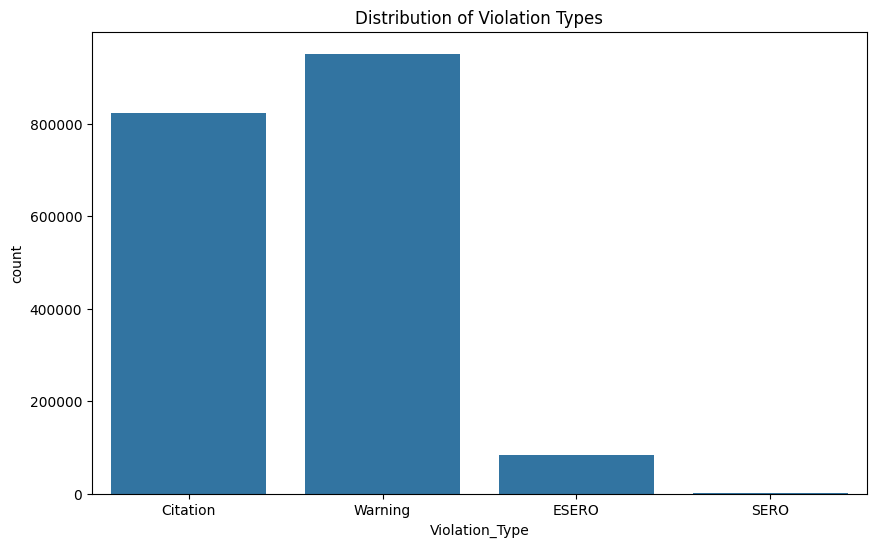

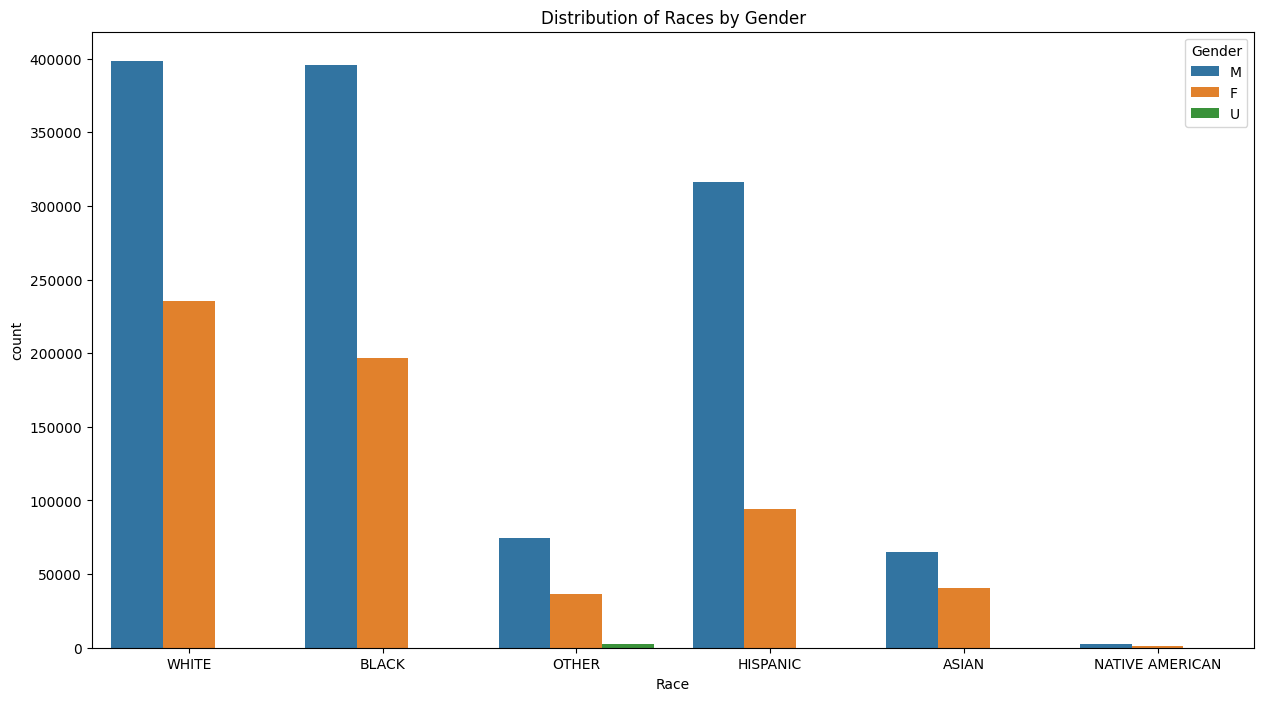

ValueError: could not convert string to float: '05/01/2023'

In [40]:

# Visualize the distribution of the target variable 'Violation_Type'
plt.figure(figsize=(10, 6))
sns.countplot(x='Violation_Type', data=data)
plt.title('Distribution of Violation Types')
plt.show()

# Visualize the distribution of some categorical features
plt.figure(figsize=(15, 8))
sns.countplot(x='Race', data=data, hue='Gender')
plt.title('Distribution of Races by Gender')
plt.show()

# Correlation matrix for numerical features
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Explore the relationship between 'Search_Conducted' and 'Search_Outcome'
plt.figure(figsize=(10, 6))
sns.countplot(x='Search_Conducted', data=data, hue='Search_Outcome')
plt.title('Relationship between Search Conducted and Outcome')
plt.show()


In [24]:
data.Violation_Type.unique()

array(['Citation', 'Warning', 'ESERO', 'SERO'], dtype=object)

In [11]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859607 entries, 0 to 1859606
Data columns (total 42 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Date Of Stop             object 
 1   Time Of Stop             object 
 2   Agency                   object 
 3   SubAgency                object 
 4   Description              object 
 5   Location                 object 
 6   Latitude                 float64
 7   Longitude                float64
 8   Accident                 object 
 9   Belts                    object 
 10  Personal_Injury          object 
 11  Property Damage          object 
 12  Fatal                    object 
 13  Commercial License       object 
 14  HAZMAT                   object 
 15  Commercial Vehicle       object 
 16  Alcohol                  object 
 17  Work_Zone                object 
 18  Search_Conducted         object 
 19  Search Disposition       object 
 20  Search_Outcome           object 
 21  Search_R

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed_To_Accident,Race,Gender,Driver_City,Driver_State,DL_State,Arrest_Type,Geolocation
0,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,No,...,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,04/30/2023,23:55:00,MCP,"4th District, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,KEMP MILL ROAD @ ALPERT LANE,39.053038,-77.024637,No,No,...,13-401(h),Transportation Article,False,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0530383333333, -77.0246366666667)"
2,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,...,21-901.1(b),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
3,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,...,21-901.1(a),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
4,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,...,21-301(a),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"


In [21]:
zero_lat = data[data.Latitude == 0.000000]
print(zero_lat.shape)
print(zero_lat.Accident.unique())
print(zero_lat.Longitude.unique())
zero_lat.head()


(128791, 42)
['No' 'Yes']
[0.         0.01666667]


,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed_To_Accident,Race,Gender,Driver_City,Driver_State,DL_State,Arrest_Type,Geolocation
0,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.0,0.0,No,No,...,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
9,04/30/2023,10:43:00,MCP,"3rd District, Silver Spring",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,650 AT LOCKWOOD DR,0.0,0.0,No,Yes,...,16-303(c),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
10,04/30/2023,10:43:00,MCP,"3rd District, Silver Spring",DISPLAYING REG. PLATE ISSUED FOR OTHER VEHICLE,650 AT LOCKWOOD DR,0.0,0.0,No,Yes,...,13-411(g),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
11,04/30/2023,10:43:00,MCP,"3rd District, Silver Spring","DRIVING WHILE LIC. SUSP. UNDER 16-203, 16-206A...",650 AT LOCKWOOD DR,0.0,0.0,No,Yes,...,16-303(h),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
12,04/30/2023,10:43:00,MCP,"3rd District, Silver Spring",KNOWINGLY DRIVING UNINSURED VEHICLE,650 AT LOCKWOOD DR,0.0,0.0,No,Yes,...,17-107(a1),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [22]:
data.isnull().sum()

Date Of Stop                     0
Time Of Stop                     0
Agency                           0
SubAgency                        0
Description                     10
Location                         4
Latitude                         0
Longitude                        0
Accident                         0
Belts                            0
Personal_Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work_Zone                        0
Search_Conducted            704972
Search Disposition         1776435
Search_Outcome              724229
Search_Reason              1776435
Search_Reason_For_Stop      705239
Search_Type                1776443
Search_Arrest_Reason       1802720
State                           59
VehicleType                      0
Year                         10344
Make                

In [23]:
data.nunique()

Date Of Stop                 4172
Time Of Stop                 1440
Agency                          1
SubAgency                       9
Description                 16201
Location                   245591
Latitude                   339743
Longitude                  383063
Accident                        2
Belts                           2
Personal_Injury                 2
Property Damage                 2
Fatal                           2
Commercial License              2
HAZMAT                          2
Commercial Vehicle              2
Alcohol                         2
Work_Zone                       2
Search_Conducted                2
Search Disposition              7
Search_Outcome                  5
Search_Reason                  10
Search_Reason_For_Stop        794
Search_Type                     6
Search_Arrest_Reason            9
State                          71
VehicleType                    33
Year                          397
Make                         4540
Model         